This is the average daily car traffic per neighborhood

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
traffic = pd.read_csv("TrafficCount.csv")

list = {}
for index, row in traffic.iterrows():
    item = row["neighborhood"]
    if(item in list):
        list[item] += 1
    else:
        list[item] = 1
print(list)


{'Polish Hill': 6, 'Central Lawrenceville': 8, 'Windgap': 3, 'Squirrel Hill South': 28, 'Perry North': 14, 'Central Northside': 7, 'Squirrel Hill North': 12, 'Central Oakland': 8, 'East Liberty': 16, 'Greenfield': 7, 'Bluff': 8, 'Crafton Heights': 1, 'Shadyside': 18, 'Upper Lawrenceville': 1, 'Highland Park': 16, 'North Shore': 3, 'Mount Washington': 16, 'Brookline': 12, 'South Shore': 2, 'South Side Flats': 4, 'Bloomfield': 21, 'Larimer': 11, 'Friendship': 2, 'South Oakland': 4, 'Point Breeze': 12, 'Westwood': 4, 'Regent Square': 1, 'Knoxville': 2, 'Strip District': 11, 'West Oakland': 2, 'Beechview': 4, 'South Side Slopes': 11, 'Upper Hill': 4, 'North Oakland': 8, 'Stanton Heights': 4, 'Manchester': 10, 'Morningside': 8, 'Hazelwood': 5, 'Lower Lawrenceville': 3, 'Overbrook': 2, 'East Hills': 7, 'Duquesne Heights': 1, 'Lincoln-Lemington-Belmar': 4, 'Sheraden': 4, 'Elliott': 5, 'Central Business District': 2, 'St. Clair': 2, 'Perry South': 6, 'Carrick': 10, 'Allegheny Center': 1, 'East

In [32]:
num_traffic = pd.Series(list)
print(num_traffic.to_frame())

                        0
Polish Hill             6
Central Lawrenceville   8
Windgap                 3
Squirrel Hill South    28
Perry North            14
...                    ..
Chartiers City          1
Summer Hill             2
Troy Hill               1
Middle Hill             1
Crawford-Roberts        1

[75 rows x 1 columns]


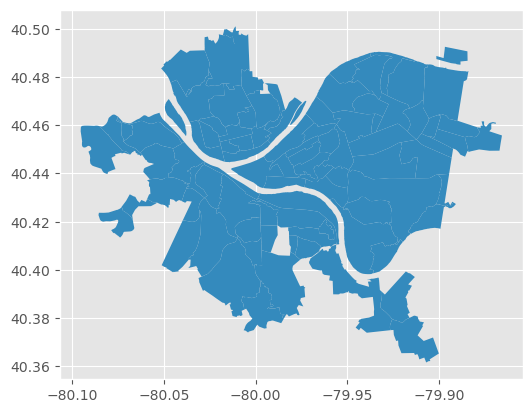

In [33]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()
plt.style.use('ggplot')
plt.show()


In [34]:
merged = neighborhoods.merge(num_traffic.rename("count"), left_on="hood", right_on=num_traffic.index)
merged[["hood", "count", "geometry"]]

,hood,count,geometry
0,Central Oakland,8,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,8,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,2,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,1,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,11,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
69,Upper Hill,4,"POLYGON ((-79.95641 40.45836, -79.95615 40.458..."
70,Middle Hill,1,"MULTIPOLYGON (((-79.97980 40.44761, -79.97979 ..."
71,Chartiers City,1,"POLYGON ((-80.06952 40.46044, -80.06944 40.460..."
72,California-Kirkbride,4,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."


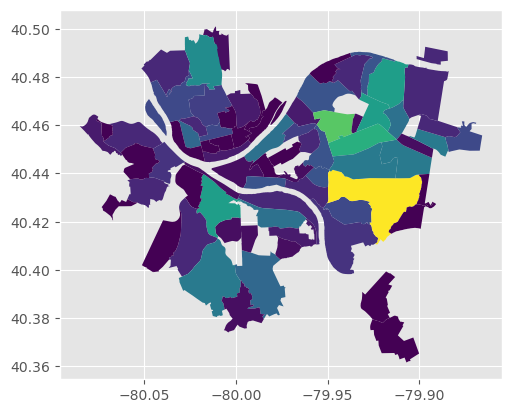

In [35]:
merged.plot(column="count")
plt.show()

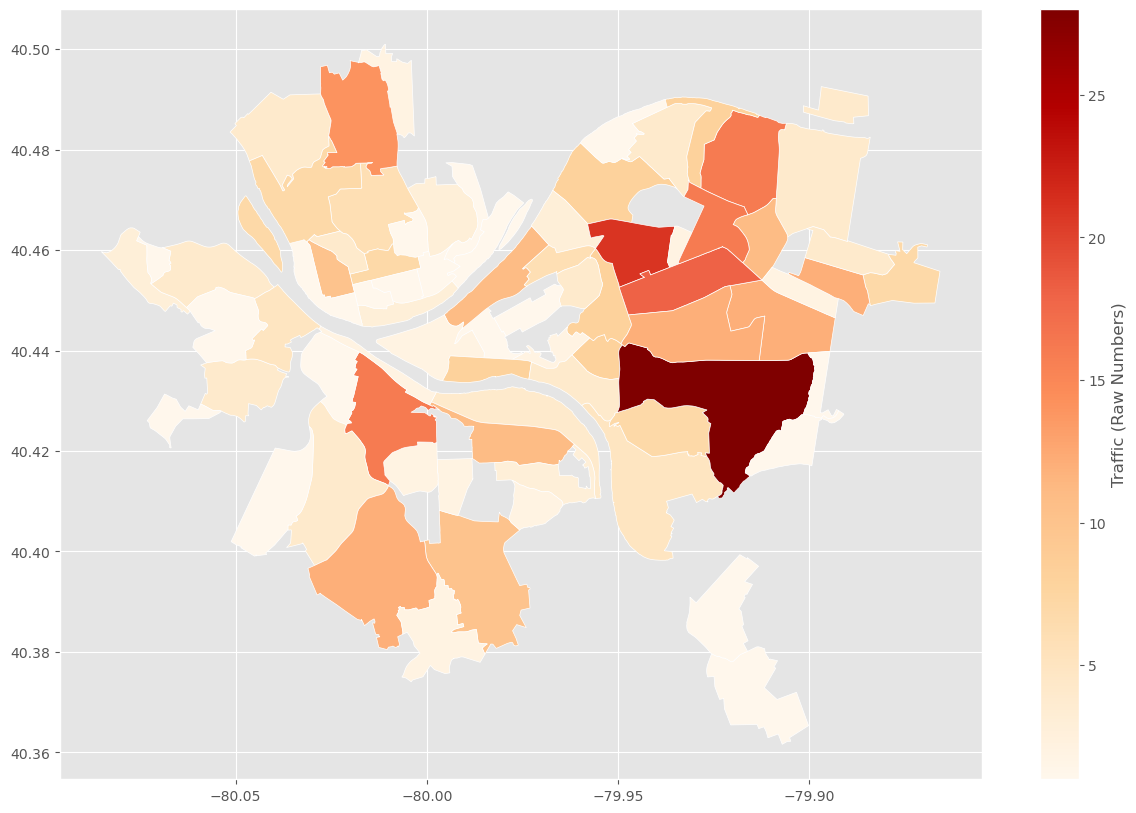

In [36]:
merged.plot(column='count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Traffic (Raw Numbers)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

In [13]:
population = pd.read_csv("total-population.csv")[["Neighborhood", "Estimate; Total"]]
merged_2 = merged.merge(population, left_on="hood", right_on="Neighborhood")
print(merged_2)


    objectid  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         0.0        42        003    040500          1   
1          2         1.0        42        003    040400          1   
2          3         2.0        42        003    040200          2   
3          4         3.0        42        003    030500          2   
4          5         5.0        42        003    020300          1   
..       ...         ...       ...        ...       ...        ...   
69        83       338.0        42        003    050600          3   
70        84       348.0        42        003    050100          3   
71        87       265.0        42        003    563000          4   
72        90        57.0        42        003    250700          1   
73      1292         NaN      None       None      None       None   

         geoid10     namelsad10 mtfcc10 funcstat10  ...  created_us  \
0   420030405001  Block Group 1   G5030          S  ...   pgh.admin   
1   420030404001 

In [14]:
merged_2["traffic_per"] = merged_2["count"]/merged_2["Estimate; Total"] * 100
merged_2["traffic_per"]

0     0.137410
1     0.083316
2     0.116482
3     0.044944
4     1.472557
        ...   
69    0.212314
70    0.056818
71    0.178571
72    0.498132
73    0.371254
Name: traffic_per, Length: 74, dtype: float64

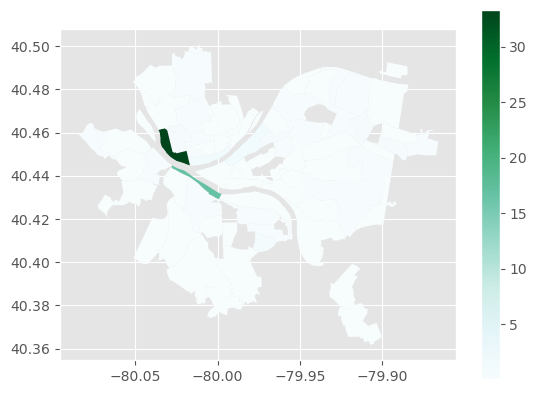

In [17]:
merged_2.plot(column="traffic_per", cmap="BuGn", legend="true")
plt.show()

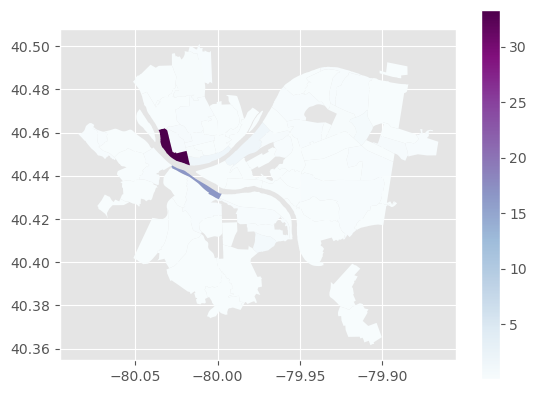

In [20]:
less_100 = merged_2["traffic_per"] < 100
crime_query_mask = merged_2[less_100]
crime_query_mask.plot(column="traffic_per", cmap="BuPu", legend="true")
plt.show()

In [21]:
top = merged_2.sort_values(by="traffic_per", ascending=True).head()
top

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,count,Neighborhood,Estimate; Total,traffic_per
55,62,184.0,42,003,281400,1,420032814001,Block Group 1,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,2.092875e+07,21252.775981,"POLYGON ((-80.04222 40.44447, -80.04241 40.444...",1,Crafton Heights,3964.0,0.025227
42,48,122.0,42,003,202300,4,420032023004,Block Group 4,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,2.699251e+07,25473.015385,"POLYGON ((-80.02969 40.42127, -80.02976 40.419...",1,Banksville,3858.0,0.025920
62,73,246.0,42,003,310200,4,420033102004,Block Group 4,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,2.741278e+07,27506.008280,"POLYGON ((-79.91046 40.37847, -79.91042 40.378...",1,Lincoln Place,3499.0,0.028580
36,41,93.0,42,003,101100,3,420031011003,Block Group 3,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.129003e+07,19198.897168,"POLYGON ((-79.93866 40.48790, -79.93917 40.487...",1,Upper Lawrenceville,2754.0,0.036311
32,36,77.0,42,003,191100,2,420031911002,Block Group 2,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.736182e+07,19324.721022,"POLYGON ((-80.01916 40.43097, -80.01925 40.430...",1,Duquesne Heights,2522.0,0.039651


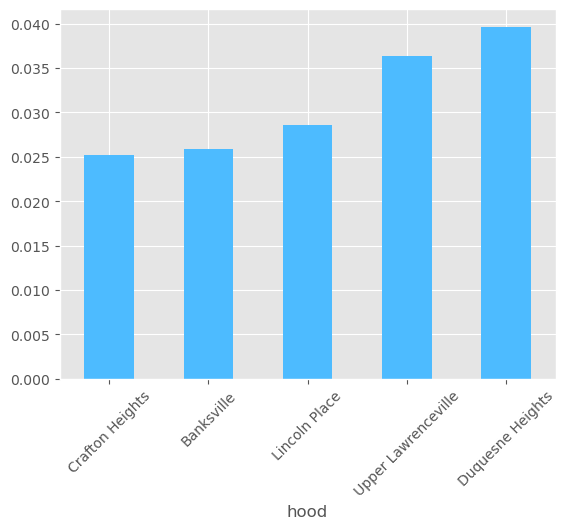

In [23]:
top.plot.bar(x="hood", y="traffic_per", legend=False, rot=45, color="#4dbbff")
plt.show()